# Import libraries

In [41]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import os

% matplotlib inline

eV = 1.6e-19

## plot electron dispersion in reduced regime

In [42]:
directory = "/Users/amirhossein/research/exciton_energy"
filename = os.path.join(directory,"cnt1.el_energy_redu.dat")
with open(filename, mode='r') as f:            
    line = f.readline()
    line = f.readline() # second line contains the shape of the cube
    dims = list(map(int, line.split()))
    
    data = np.loadtxt(f)
    
    print("dimensions are n_c: {}, n_k: {}, n_mu: {}".format(dims[0], dims[1], dims[2]))
    
    assert dims[0]*dims[2] is data.shape[0]
    el_energy_reduced = np.empty(dims)
    for k in range(dims[2]):
        el_energy_reduced [:,:,k] = data[k*dims[0]:(k+1)*dims[0], :]
    
    fig=plt.figure(figsize=(18, 9), dpi= 80, facecolor='w', edgecolor='k')
    for i in range(dims[0]):
        for k in range(dims[2]):
            plt.plot(el_energy_reduced[i,:,k], linewidth=3)

    plt.title('electron energy bands versus k-vector', size=24)
    plt.xlabel('k-vector', size=20)
    plt.ylabel('energy [eV]', size=20)
        

FileNotFoundError: [Errno 2] No such file or directory: '/Users/amirhossein/research/exciton_energy/cnt1.el_energy_redu.dat'

# Plot real and imaginary parts of $v_{b,b'}(q)$

dimensions are [79599, 1, 4]
(79599, 1, 4)
dimensions are [79599, 1, 4]


Text(0,0.5,'energy [eV]')

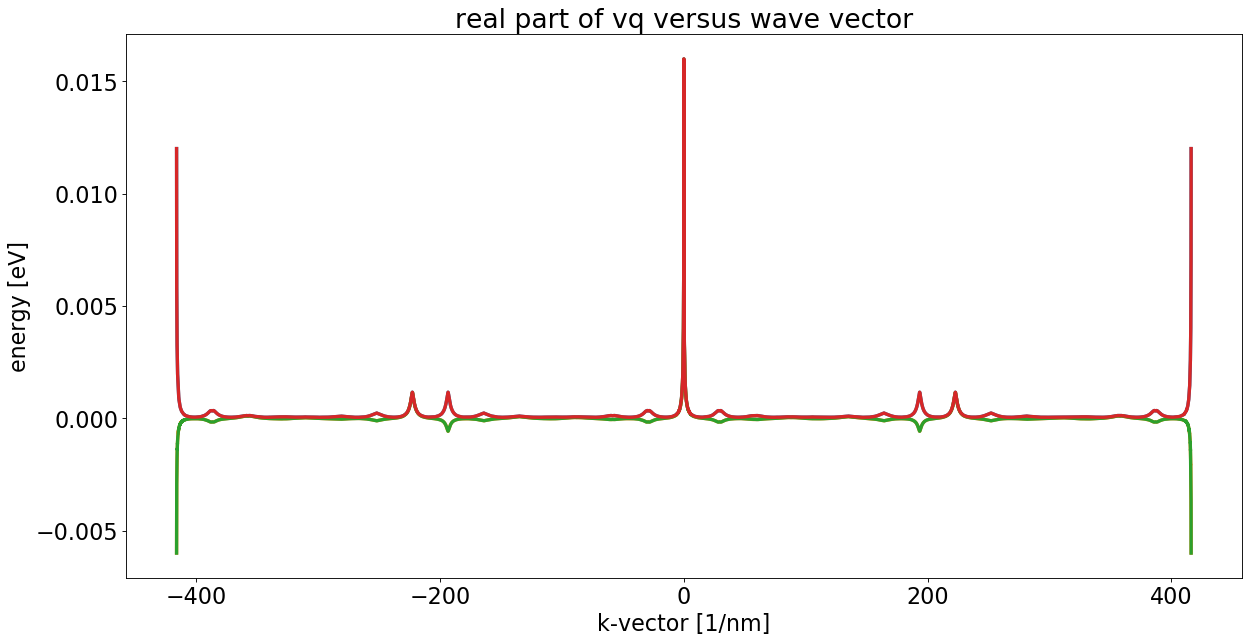

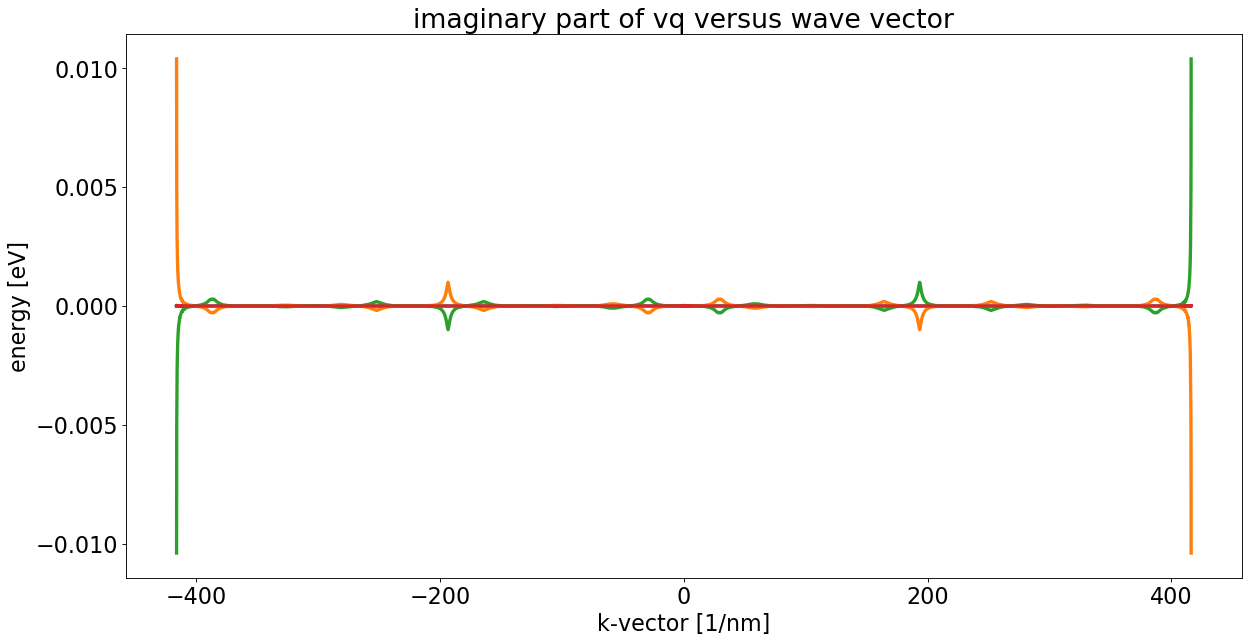

In [48]:
directory = "/Users/amirhossein/research/exciton_energy"

# load q_vector
filename = os.path.join(directory,"cnt1.vq_q_vec.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)
q_vec = np.empty(dims)
q_vec = data/1e9
# print("q_vec dimensions")

# load and plot real part of vq
filename = os.path.join(directory,"cnt1.vq_real.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)
data = np.reshape(data,(dims[0]*dims[2],dims[1]))

print("dimensions are {}".format(dims))

assert dims[0]*dims[2] == data.shape[0], "Mismatch in data dimensions: {}".format(data.shape)
vq_real = np.empty(dims)
print(vq_real.shape)
for k in range(dims[2]):
    vq_real[:,:,k] = data[k*dims[0]:(k+1)*dims[0], :]

fig=plt.figure(figsize=(18, 9), dpi= 80, facecolor='w', edgecolor='k')
for j in range(dims[1]):
    for k in range(dims[2]):
        plt.plot(q_vec,vq_real[:,j,k]/eV, linewidth=3)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('real part of vq versus wave vector', size=24)
plt.xlabel('k-vector [1/nm]', size=20)
plt.ylabel('energy [eV]', size=20)

# load and plot imaginary part of vq
filename = os.path.join(directory,"cnt1.vq_imag.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)
data = np.reshape(data,(dims[0]*dims[2],dims[1]))

print("dimensions are {}".format(dims))

assert dims[0]*dims[2] == data.shape[0], "Mismatch in data dimensions: {}".format(data.shape)
vq_imag = np.empty(dims)
for k in range(dims[2]):
    vq_imag[:,:,k] = data[k*dims[0]:(k+1)*dims[0], :]

fig=plt.figure(figsize=(18, 9), dpi= 80, facecolor='w', edgecolor='k')
for j in range(dims[1]):
    for k in range(dims[2]):
        plt.plot(q_vec, vq_imag[:,j,k]/eV, linewidth=3)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('imaginary part of vq versus wave vector', size=24)
plt.xlabel('k-vector [1/nm]', size=20)
plt.ylabel('energy [eV]', size=20)
        

# Plot polarization: $\Pi(q)$

dimensions are [79599, 1]


Text(0,0.5,'Polarization[1/Jouls]')

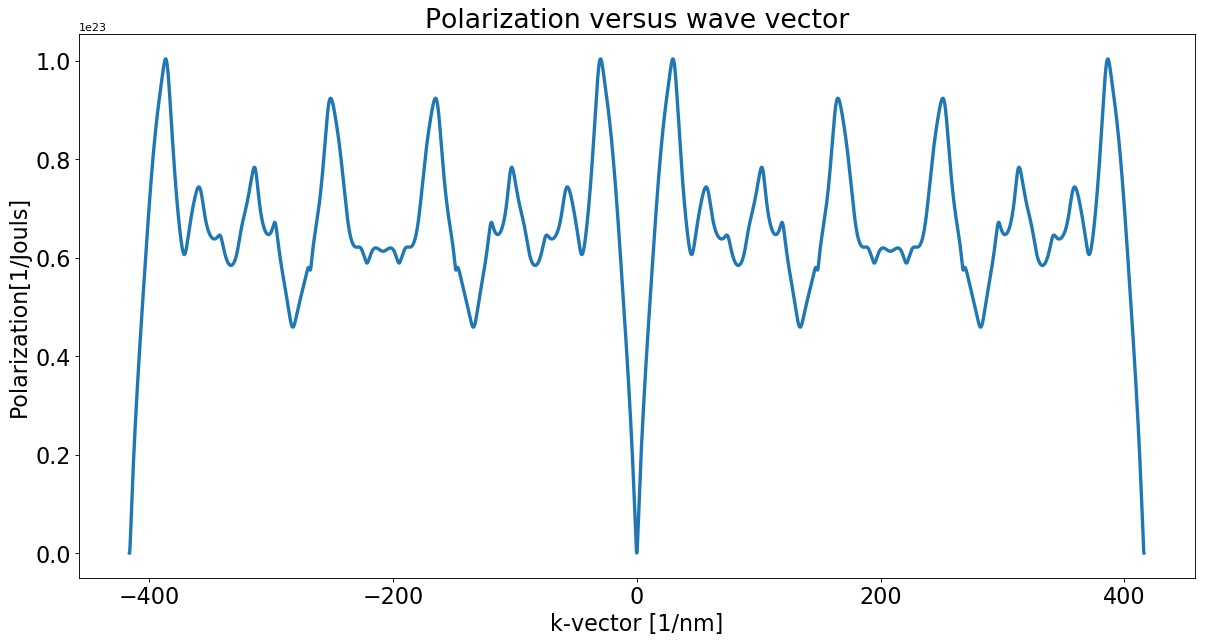

In [50]:
directory = "/Users/amirhossein/research/exciton_energy"

# load q_vector
filename = os.path.join(directory,"cnt1.PI_q_vec.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)
q_vec = np.empty(dims)
q_vec = data/1e9

# load and plot polarization vq
filename = os.path.join(directory,"cnt1.PI.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)
data = np.reshape(data,(dims[0],dims[1]))

print("dimensions are {}".format(dims))

PI = data

fig=plt.figure(figsize=(18, 9), dpi= 80, facecolor='w', edgecolor='k')
for i in range(dims[1]):
    plt.plot(q_vec,PI[:,i], linewidth=3)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Polarization versus wave vector', size=24)
plt.xlabel('k-vector [1/nm]', size=20)
plt.ylabel('Polarization[1/Jouls]', size=20)

# Calculate and plot dielectric function $\epsilon(q)$
Use the data loaded from two previous sections

Text(0,0.5,'dielectric function')

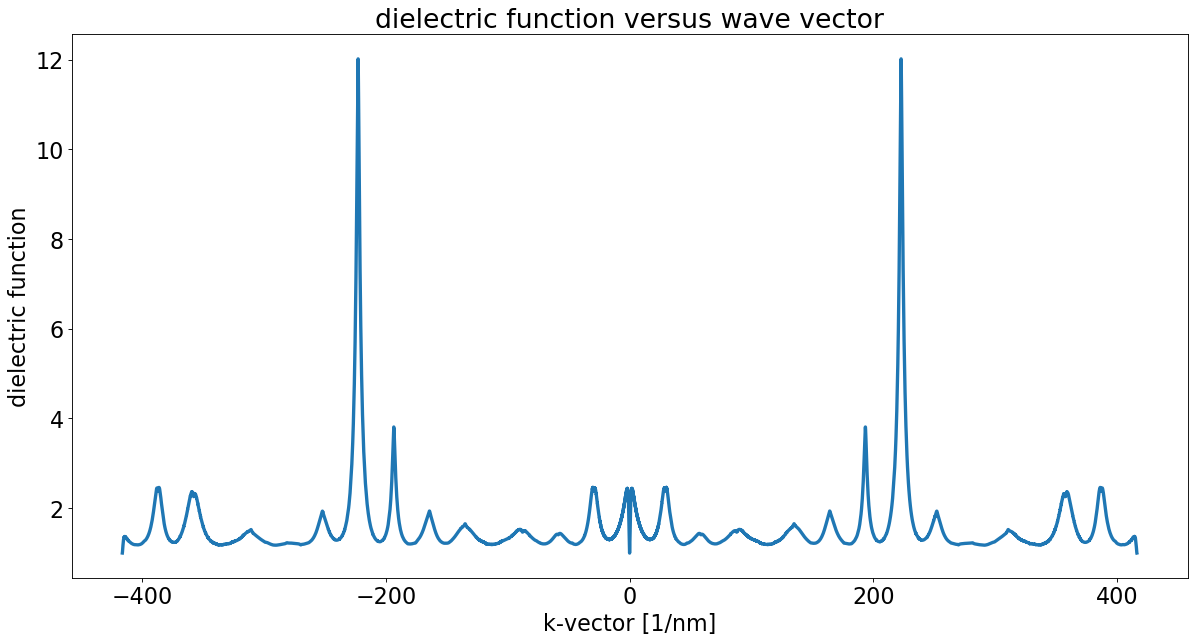

In [51]:
vq_mean = np.mean(vq_real,axis=2)
eps = 1+np.multiply(vq_mean,PI)

fig=plt.figure(figsize=(18, 9), dpi= 80, facecolor='w', edgecolor='k')
for i in range(dims[1]):
    plt.plot(q_vec,eps, linewidth=3)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('dielectric function versus wave vector', size=24)
plt.xlabel('k-vector [1/nm]', size=20)
plt.ylabel('dielectric function', size=20)

# Load and plot dielectric function $\epsilon(q)$
Load data from what was calculated by `cpp` code

dimensions are [79599, 1]


Text(0,0.5,'Dielectric function')

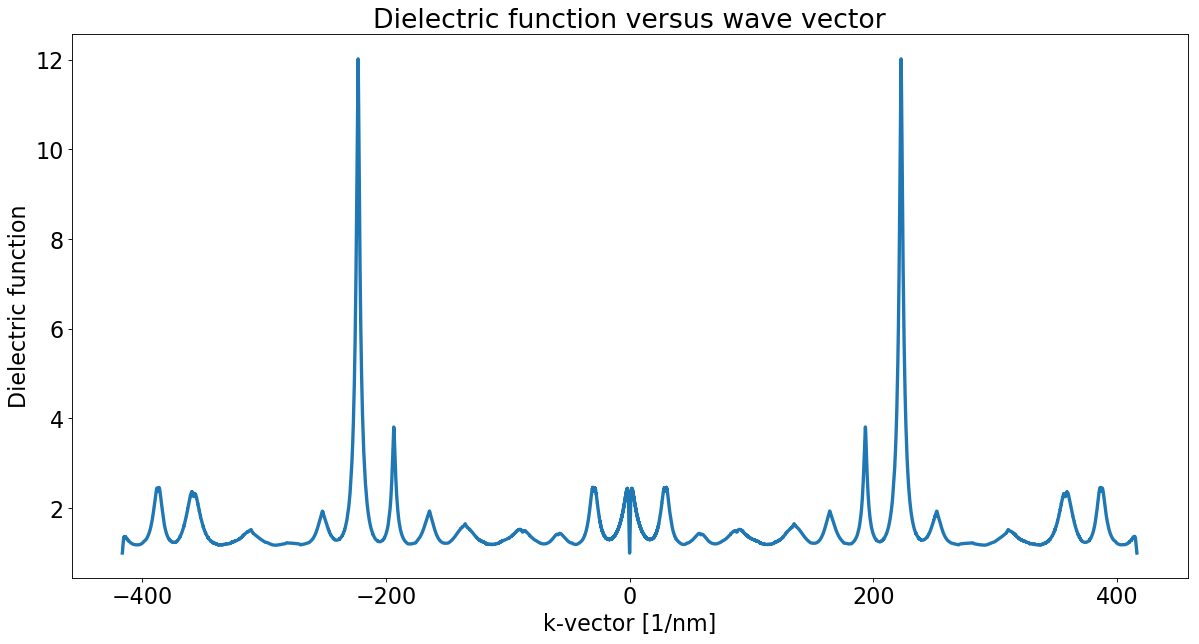

In [52]:
directory = "/Users/amirhossein/research/exciton_energy"

# load q_vector
filename = os.path.join(directory,"cnt1.eps_q_vec.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)
q_vec = np.empty(dims)
q_vec = data/1e9

# load and plot dielectric function
filename = os.path.join(directory,"cnt1.eps.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)
data = np.reshape(data,(dims[0],dims[1]))

print("dimensions are {}".format(dims))

eps = data

fig=plt.figure(figsize=(18, 9), dpi= 80, facecolor='w', edgecolor='k')
for i in range(dims[1]):
    plt.plot(q_vec,eps[:,i], linewidth=3)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Dielectric function versus wave vector', size=24)
plt.xlabel('k-vector [1/nm]', size=20)
plt.ylabel('Dielectric function', size=20)

# Load and plot exciton energy dispersion:
## Both singlet and triplet excitons

dimensions are [244, 122]
dimensions are [244, 122]
dimensions are [244, 122]


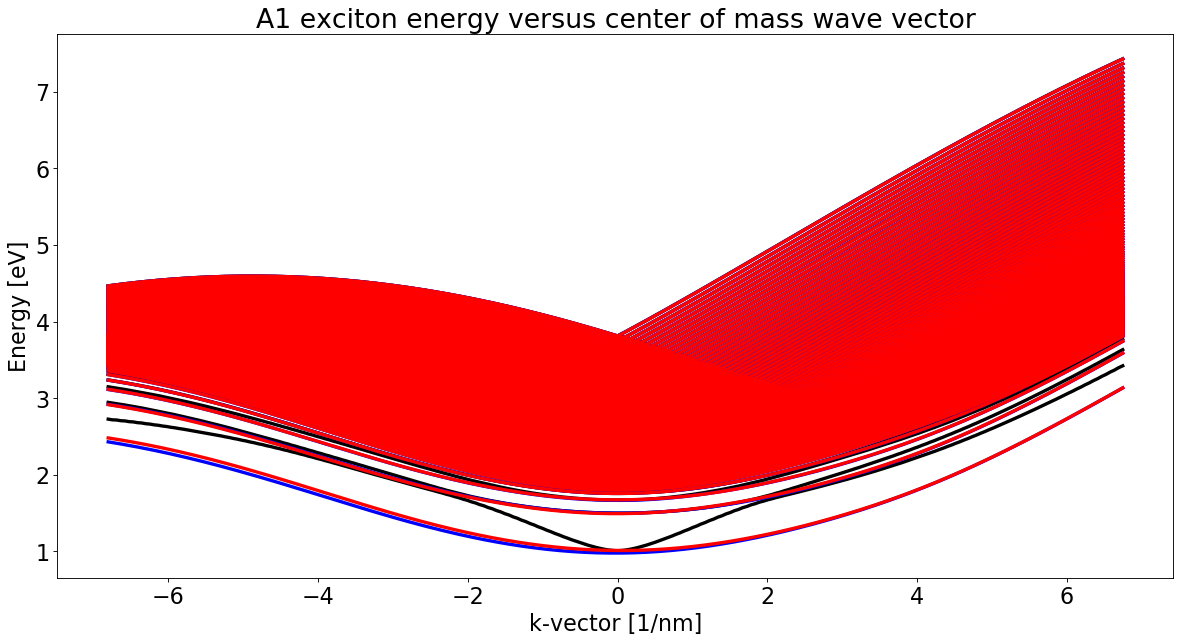

In [68]:
directory = "/Users/amirhossein/research/exciton_energy"

######################################
# load q_vector
######################################
filename = os.path.join(directory,"cnt1.exciton_k_cm_vec.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)
k_cm_vec = np.empty(dims)
k_cm_vec = data/1e9

######################################
# load and plot A2 singlet exciton energy
######################################
filename = os.path.join(directory,"cnt1.ex_energy_A2_singlet.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)
data = np.reshape(data,(dims[0],dims[1]))

print("dimensions are {}".format(dims))

ex_energy_A2_singlet = data

fig=plt.figure(figsize=(18, 9), dpi= 80, facecolor='w', edgecolor='k')
for i in range(dims[1]):
    plt.plot(k_cm_vec,ex_energy_A2_singlet[:,i]/eV, linewidth=3, color='black')

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Singlet exciton energy versus center of mass wave vector', size=24)
plt.xlabel('k-vector [1/nm]', size=20)
plt.ylabel('Energy [eV]', size=20)
ymin = np.amin(ex_energy_A2_singlet)/eV;
# plt.xlim([-4,4])
# plt.ylim([ymin,ymin+1])

######################################
# load and plot A2 triplet exciton energy
######################################
filename = os.path.join(directory,"cnt1.ex_energy_A2_triplet.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)
data = np.reshape(data,(dims[0],dims[1]))

print("dimensions are {}".format(dims))

ex_energy_A2_triplet = data

# fig=plt.figure(figsize=(18, 9), dpi= 80, facecolor='w', edgecolor='k')
for i in range(dims[1]):
    plt.plot(k_cm_vec,ex_energy_A2_triplet[:,i]/eV, linewidth=3, color='blue')

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('A2 triplet exciton energy versus center of mass wave vector', size=24)
plt.xlabel('k-vector [1/nm]', size=20)
plt.ylabel('Energy [eV]', size=20)
ymin = np.amin(ex_energy_triplet)/eV;
# plt.xlim([-4,4])
# plt.ylim([ymin,ymin+1])

######################################
# load and plot A1 exciton energy
######################################
filename = os.path.join(directory,"cnt1.ex_energy_A1.dat")
f = open(filename,mode='r')
line = f.readline()
line = f.readline() # second line contains the shape of the cube
dims = list(map(int, line.split()))

data = np.loadtxt(f)
data = np.reshape(data,(dims[0],dims[1]))

print("dimensions are {}".format(dims))

ex_energy_A1 = data

# fig=plt.figure(figsize=(18, 9), dpi= 80, facecolor='w', edgecolor='k')
for i in range(dims[1]):
    plt.plot(k_cm_vec,ex_energy_A1[:,i]/eV, linewidth=3,color='red')

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('A1 exciton energy versus center of mass wave vector', size=24)
plt.xlabel('k-vector [1/nm]', size=20)
plt.ylabel('Energy [eV]', size=20)
ymin = np.amin(ex_energy_triplet)/eV;
# plt.xlim([-4,4])
# plt.ylim([ymin,ymin+1])